<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tensorflow-tutorials-:-합성곱-신경망" data-toc-modified-id="Tensorflow-tutorials-:-합성곱-신경망-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tensorflow tutorials : <a href="https://www.tensorflow.org/tutorials/images/cnn?hl=ko" target="_blank">합성곱 신경망</a></a></span><ul class="toc-item"><li><span><a href="#feature-map-visualization" data-toc-modified-id="feature-map-visualization-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>feature map visualization</a></span><ul class="toc-item"><li><span><a href="#activation-후" data-toc-modified-id="activation-후-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>activation 후</a></span></li><li><span><a href="#padding-후" data-toc-modified-id="padding-후-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>padding 후</a></span></li></ul></li><li><span><a href="#filter-visualization" data-toc-modified-id="filter-visualization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>filter visualization</a></span></li></ul></li><li><span><a href="#Augmentation" data-toc-modified-id="Augmentation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Augmentation</a></span></li><li><span><a href="#Tensorflow-tutorials-:-Image-classification" data-toc-modified-id="Tensorflow-tutorials-:-Image-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tensorflow tutorials : <a href="https://www.tensorflow.org/tutorials/images/classification?hl=ko" target="_blank">Image classification</a></a></span></li></ul></div>

# [AI 오픈 이노베이션] 기본 저녁반<a class="tocSkip">
GitHub link: [https://github.com/realblack0/ai_lecture_fundamental](https://github.com/realblack0/ai_lecture_fundamental)  
E-Mail: realblack0@gmail.com

## Tensorflow tutorials : [합성곱 신경망](https://www.tensorflow.org/tutorials/images/cnn?hl=ko)

이번 수업은 tensorflow 공식 tutorial : [합성곱 신경망](https://www.tensorflow.org/tutorials/images/cnn?hl=ko)을 참조하였습니다.

In [2]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Convolution2D, MaxPool2D, MaxPooling2D, \
                                    AvgPool2D, AveragePooling2D, Dense, Flatten

다음 레이어들은 단축 표현이다.

In [22]:
print("Conv2D is Convolution2D :", Conv2D is Convolution2D)
print("MaxPool2D is MaxPooling2D :", MaxPool2D is MaxPooling2D)
print("AvgPool2D is AveragePooling2D :", AvgPool2D is AveragePooling2D)

Conv2D is Convolution2D : True
MaxPool2D is MaxPooling2D : True
AvgPool2D is AveragePooling2D : True


In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

연습용으로 CNN으로만 된모델을 만들어 본다.

In [28]:
model = Sequential([
    Conv2D(16, (3,3), input_shape=(28, 28, 1))
])

CNN에 넣기 위해서 색상 차원을 추가해준다.

In [14]:
X_train = X_train.reshape(60000, 28, 28, 1)

데이터 1개만 `predict`한다.  
`predict`는 input에 대하여 모델의 가중치를 곱하기만 한다. (Feed Forward)  
학습하지 않아도 랜덤하게 가중치가 초기화 생성된다.

In [ ]:
# Error
x = model.predict(X_train[0])

shape 에러가 발생했다.  
학습할때와 shape을 맞춰줘야한다.  
batch 차원이 빠졌다. 
```
ValueError: Error when checking input: expected conv2d_2_input to have 4 dimensions, but got array with shape (28, 28, 1)
```

차원은 `newaxis`로 만들 수 있다.

In [26]:
X_train[0][tf.newaxis].shape

(1, 28, 28, 1)

`...`은 이후의 모든 차원을 의미하며, 생략 가능하다.

In [27]:
# 위 코드와 같음
X_train[0][tf.newaxis, ...].shape

(1, 28, 28, 1)

numpy의 newaxis와 같다.

In [7]:
import numpy as np

In [25]:
tf.newaxis is np.newaxis

True

numpy의 `newaxis`는 None이었다.

In [24]:
np.newaxis is None

True

In [9]:

tf.newaxis is None

True

### feature map visualization

convolution 레이어를 지나면 input 데이터가 어떻게 변하는지 output인 feature map을 직접 확인해본다.

In [10]:
import matplotlib.pyplot as plt

convolution layer를 거쳐서 얻은 feature map이다.

In [29]:
x = model.predict(X_train[0][np.newaxis])

차원을 확인해본다.

In [30]:
# (batch, height, width, feture map)
x.shape

(1, 26, 26, 16)

convolution layer의 filter 개수가 16개이었으므로 feature map이 16개 있다.  
그 중 하나만 가져온다.

In [32]:
x[..., 0].shape

(1, 26, 26)

matplotlib으로 시각화하기 위해서 shape을 맞춰준다.

In [13]:
x[..., 0].reshape(26,26)

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00

시각화해보면 다음과 같다.

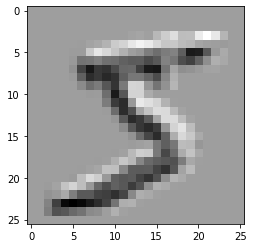

In [17]:
# 컨볼루션 후
plt.imshow(x[..., 0].reshape(26,26), cmap="gray")

convolution 전과 후를 비교해보자.

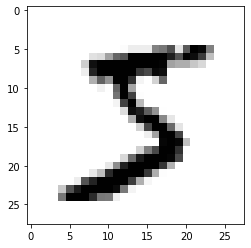

In [21]:
# 컨볼루션 전
plt.imshow(X_train[0].squeeze(), cmap="binary")

#### activation 후 

이번에는 convolution 레이어에 activation function을 추가한 후 결과를 확인해본다.

In [22]:
model = Sequential([
    Conv2D(16, (3,3), activation="relu", input_shape=(28, 28, 1))
])

In [25]:
x = model.predict(X_train[0][np.newaxis])

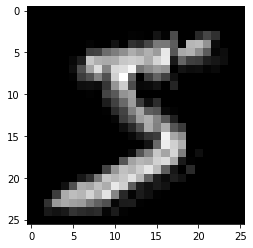

In [26]:
plt.imshow(x[..., 0].reshape(26,26), cmap="gray")

#### padding 후

이번에는 convolution 레이어에 padding을 사용한 후 결과를 확인해본다.  
padding을 사용하는 이유는 엣지도 전체와 동일하게 연산되도록 하기 위해서 이다.

In [12]:
# padding default는 valid
model = Sequential([
    Conv2D(16, (3,3), padding="same", activation="relu", input_shape=(28, 28, 1))
])

In [15]:
x = model.predict(X_train[0][np.newaxis])

`padding` 옵션을 썼기 때문에 feature map의 shape이 달라졌다.  
'same'을 썼기 때문에 input과 동일한 shape으로 출력되었다.

In [17]:
x.shape

(1, 28, 28, 16)

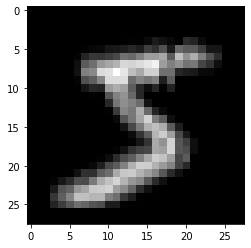

In [18]:
plt.imshow(x[..., 0].reshape(28, 28), cmap="gray")

### filter visualization

이번에는 filter 자체는 어떻게 생겼는지 시각화 해본다.

`layers`는 모델의 layer를 list로 반환한다.

In [33]:
model.layers

`kernel`은 레이어의 가중치(= cnn의 filter)를 반환한다.

In [34]:
model.layers[0].kernel

<tf.Variable 'conv2d_3/kernel:0' shape=(3, 3, 1, 16) dtype=float32, numpy=
array([[[[-1.04608372e-01,  1.57298192e-01, -4.51647788e-02,
          -1.48952767e-01, -5.70851117e-02,  6.88570589e-02,
          -1.44072324e-02, -4.44611460e-02, -2.52780020e-02,
          -1.60133824e-01,  6.59312457e-02,  1.73965052e-01,
           4.41558212e-02, -8.50336701e-02,  1.01798490e-01,
           7.29364306e-02]],

        [[-1.16832435e-01,  6.23704493e-03, -1.81629062e-02,
           1.61425129e-01, -1.79167733e-01, -8.01799446e-02,
          -4.83737737e-02, -4.14070785e-02,  1.92062363e-01,
          -1.82580918e-01, -1.83624029e-03,  1.58115253e-01,
          -5.36002070e-02,  1.88638762e-01, -1.91415399e-01,
          -4.33623493e-02]],

        [[-9.08496752e-02, -2.36327797e-02,  5.09176999e-02,
           8.47465247e-02, -8.46265033e-02, -1.78930342e-01,
          -8.98964256e-02, -1.47869825e-01,  7.23515898e-02,
           1.02114812e-01, -1.43258810e-01,  2.07504630e-02,
           

마지막 차원이 filter 개수이다.

In [36]:
model.layers[0].kernel.shape

TensorShape([3, 3, 1, 16])

filter 16개 중 1개만 가져온다.

In [31]:
model.layers[0].kernel[..., 0]

<tf.Tensor: id=124, shape=(3, 3, 1), dtype=float32, numpy=
array([[[ 0.07472254],
        [-0.06737921],
        [ 0.05936436]],

       [[-0.08063097],
        [ 0.1409112 ],
        [ 0.0934311 ]],

       [[-0.02629149],
        [ 0.17576234],
        [-0.11072612]]], dtype=float32)>

matplotlib으로 시각화 하기 위해서 shape 변환이 필요하다.

In [61]:
model.layers[0].kernel[..., 0].shape

TensorShape([3, 3, 1])

In [ ]:
# Error
model.layers[0].kernel[..., 0].reshape(3,3)

eager tensor는 `reshape` 메소드를 지원하지 않는다.
```
AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'reshape'
```

tensor를 numpy로 바꾼 후에 `reshape`했다.

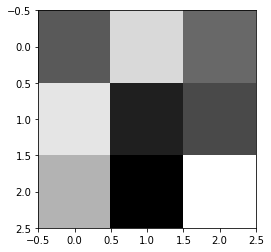

In [27]:
plt.imshow(model.layers[0].kernel[..., 0].numpy().reshape(3,3), cmap="binary")

이번에는 `Dense`까지 포함한 모델을 만든 후에 filter를 시각화 해본다.

In [71]:
model = Sequential([
    Conv2D(16, (3,3), activation="relu", input_shape=(28, 28, 1)),
    Flatten(), # Dense에 input으로 들어가기 전에 shape을 변환함
    Dense(10, activation="softmax")
])

In [72]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")

학습할때마다 filter가 달라지는 것을 관찰할 수 있다.  
학습하면서 파라미터가 업데이트되기 때문이다.

In [74]:
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 20s 333us/sample - loss: 0.8868
Epoch 2/5
60000/60000 [==============================] - 21s 348us/sample - loss: 0.0799
Epoch 3/5
60000/60000 [==============================] - 20s 337us/sample - loss: 0.0644
Epoch 4/5
60000/60000 [==============================] - 21s 355us/sample - loss: 0.0553
Epoch 5/5
60000/60000 [==============================] - 21s 345us/sample - loss: 0.0434


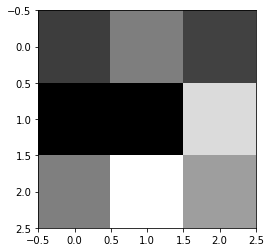

In [75]:
# 1차 학습 후
plt.imshow(model.layers[0].kernel[..., 0].numpy().reshape(3,3), cmap="binary")

In [76]:
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 352us/sample - loss: 0.0404
Epoch 2/5
60000/60000 [==============================] - 22s 360us/sample - loss: 0.0328
Epoch 3/5
60000/60000 [==============================] - 21s 356us/sample - loss: 0.0233
Epoch 4/5
60000/60000 [==============================] - 22s 361us/sample - loss: 0.0264
Epoch 5/5
60000/60000 [==============================] - 22s 373us/sample - loss: 0.0234


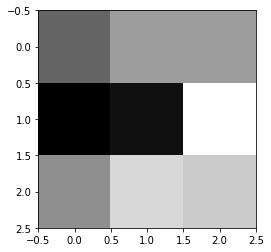

In [77]:
# 2차 학습 후
plt.imshow(model.layers[0].kernel[..., 0].numpy().reshape(3,3), cmap="binary")

In [78]:
model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 22s 372us/sample - loss: 0.0215
Epoch 2/5
60000/60000 [==============================] - 23s 378us/sample - loss: 0.0209
Epoch 3/5
60000/60000 [==============================] - 23s 383us/sample - loss: 0.0181
Epoch 4/5
60000/60000 [==============================] - 22s 364us/sample - loss: 0.0185
Epoch 5/5
60000/60000 [==============================] - 21s 356us/sample - loss: 0.0178


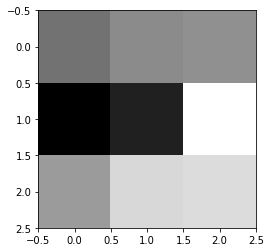

In [79]:
# 3차 학습 후
plt.imshow(model.layers[0].kernel[..., 0].numpy().reshape(3,3), cmap="binary")

## Augmentation

- 데이터 증강하는(늘리는) 방법 :
    - 반전, 회전 등
    - 기본적으로 좌우반전은 대부분 한다. 
    - 사람에 따라서 15도 회전 ~ 30도 회전 한다.
    - 기계는 augmentation한 데이터로 다양한 특징을 학습한다.
- 너무 많이 하면 특성이 사라진다. 
    - 특성이 안 없어질 정도로만 이미지 왜곡하는 것이 좋다.
    - 어느 정도가 적당한지는 알 수 없다. 직접 해봐야한다.
- 이미지 데이터는 Augmentation 기법을 많이 사용한다.
    - 데이터는 많으면 많을수록 좋다. 

In [1]:
# Keras에서 Image Augmentation해주는 기능
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- generator 방식은 메모리 효율적이다. 
- `ImageDataGenerator`를 쓰면 꼭 flow_from 써야한다.

Augmentation에 대한 더 많은 내용은 수업시간에 다룰 수 없어서 tensorflow 공식 tutorial : [Data Augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation?hl=ko)을 참조하시기 바랍니다.

## Tensorflow tutorials : [Image classification](https://www.tensorflow.org/tutorials/images/classification?hl=ko)

이번 수업은 tensorflow 공식 tutorial : [Image classification](https://www.tensorflow.org/tutorials/images/classification?hl=ko)을 참조하였습니다.

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

tensorflow 홈페이지에서 pandas 홍보해줄 수 없기 때문에 os 라이브러리 기법 썼다.  
실무에서는 pandas 사용하는게 훨씬 우아한 방법이다.

In [3]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [6]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [7]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

`ImageDataGenerator`는 이미지 데이터를 불러올 때 전처리해서 준다.  
scaling, flip, zoom, crop 등 다양한 기능을 옵션으로 제공하고 있으며, Augmentation 기법으로 활용할 수 있다.  
generator 방식이기 때문에 메모리 효율적이다.

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

`ImgaeDataGenerator`에서 이미지 데이터 가져오는 방법은 3가지가 있다. 
- `flow`
- `flow_from_dataframe`
- `flow_from_directory`

`target_size`는 이미지를 모두 같은 사이즈로 맞춰준다.  
이미지의 shape이 다르면 학습할 수가 없지만, 쉽게 이미지 크기를 통일해준다.  

In [9]:
# 여기서는 flow_from_directory를 사용함
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH), # resize
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


generator이기 때문에 `next`로 값을 가져온다.  
X와 y를 동시에 반환한다.  
X는 이미지인데, y를 만든 적이 없다.  
`flow_from_directory`는 폴더 구조를 기준으로 labeling을 알아서 해준다.

In [11]:
# X값과 y값
sample_training_images, _ = next(train_data_gen)

In [12]:
# x
sample_training_images

array([[[[0.29803923, 0.454902  , 0.3529412 ],
         [0.3254902 , 0.5019608 , 0.3803922 ],
         [0.25882354, 0.454902  , 0.31764707],
         ...,
         [0.25882354, 0.35686275, 0.37647063],
         [0.14509805, 0.20000002, 0.3137255 ],
         [0.4156863 , 0.47058827, 0.58431375]],

        [[0.25490198, 0.4039216 , 0.30588236],
         [0.24705884, 0.4039216 , 0.29803923],
         [0.27450982, 0.45882356, 0.3254902 ],
         ...,
         [0.25882354, 0.3529412 , 0.36862746],
         [0.23137257, 0.28627452, 0.38823533],
         [0.21176472, 0.26666668, 0.36862746]],

        [[0.28627452, 0.41176474, 0.32941177],
         [0.36078432, 0.49803925, 0.4039216 ],
         [0.30588236, 0.45882356, 0.3529412 ],
         ...,
         [0.28235295, 0.3647059 , 0.36862746],
         [0.19607845, 0.2627451 , 0.3254902 ],
         [0.34117648, 0.40784317, 0.47058827]],

        ...,

        [[0.40000004, 0.5176471 , 0.50980395],
         [0.37647063, 0.47058827, 0.47058827]

In [13]:
# y
_

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0.], dtype=float32)

ImageDataGenerator가 이미지를 어떻게 가져오는지 시각화한다. 

In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

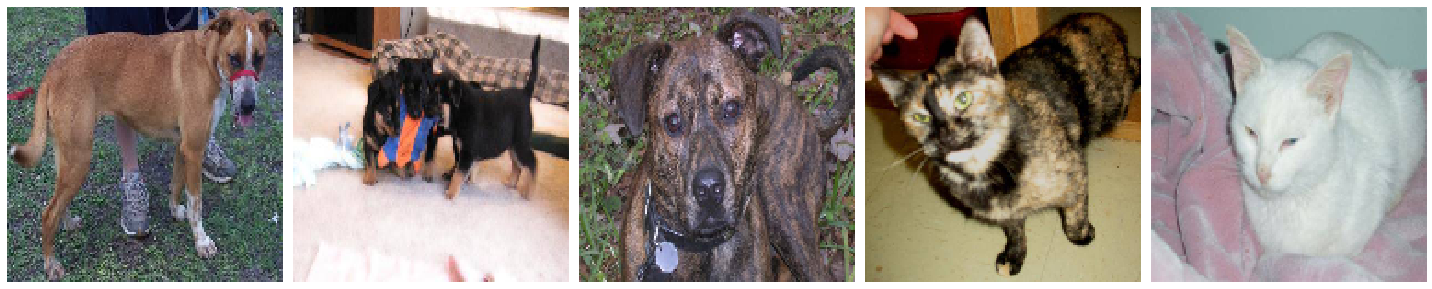

In [15]:
plotImages(sample_training_images[:5])

CNN 모델을 만들 때는 보통 Conv 레이어 뒤에 Pooling 레이어를 붙여준다. 

In [16]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(), # 중요
    Dense(512, activation='relu'),
    Dense(1)
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

문자열로 쓰면 default 값만 쓸 수 있다. 
    - 단순한 사용
객체로 쓰면 기본값을 바꿔서 변형판 쓸 수 있다.
    - 구체적 활용
    - 자동화 가능

In [18]:
# BinaryCrossentropy를 객체로 사용해서  from_logtis 기본값을 변경했다.
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

generator로 학습할 때는 `fit_generator`를 써야한다. (짝을 맞춤)  
`steps_per_epoch`는 메모리에 올릴 때 효율적으로 쓰기 위해서 데이터를 쪼갠다. (batch size와 다름)

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 40s 3s/step - loss: 1.1077 - accuracy: 0.5021 - val_loss: 0.6917 - val_accuracy: 0.5045
Epoch 2/15
15/15 [==============================] - 38s 3s/step - loss: 0.6880 - accuracy: 0.4968 - val_loss: 0.6764 - val_accuracy: 0.5569
Epoch 3/15
15/15 [==============================] - 40s 3s/step - loss: 0.6561 - accuracy: 0.5700 - val_loss: 0.6490 - val_accuracy: 0.6708
Epoch 4/15
15/15 [==============================] - 41s 3s/step - loss: 0.6108 - accuracy: 0.6396 - val_loss: 0.6140 - val_accuracy: 0.6864
Epoch 5/15
15/15 [==============================] - 37s 2s/step - loss: 0.5597 - accuracy: 0.7018 - val_loss: 0.6751 - val_accuracy: 0.6663
Epoch 6/15
15/15 [==============================] - 42s 3s/step - loss: 0.5437 - accuracy: 0.7169 - val_loss: 0.5914 - val_accuracy: 0.7031
Epoch 7/15
15/15 [==============================] - 43s 3s/step - loss: 0.4810 - accuracy: 0.7583 - val_loss: 0.5682 - val_accuracy: 0.7344
Epoch 8/15
15/15 [==

러닝 커브를 그려서 학습 중간 결과를 확인한다.  
training loss는 계속 줄어들고 validation loss는 계속 증가하므로 과적합이 발생했음을 알 수 있다. 

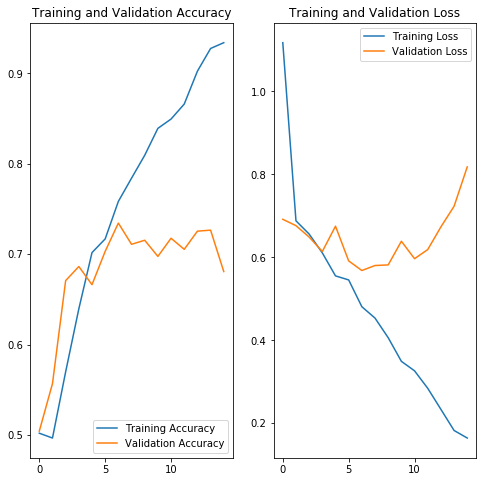

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

과적합을 극복하기 위해서 augmentation을 한다.

In [21]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,       # 이미지 회전 변형
                    width_shift_range=.15,   # 이미지 수평 평행 이동
                    height_shift_range=.15,  # 이미지 수직 평행 이동
                    horizontal_flip=True,    # 이미지 좌우 반전
                    zoom_range=0.5           # 이미지 확대 변형
                    )

In [22]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True, 
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


augmetnation 이후 이미지가 어떻게 변형되는지 확인해본다.

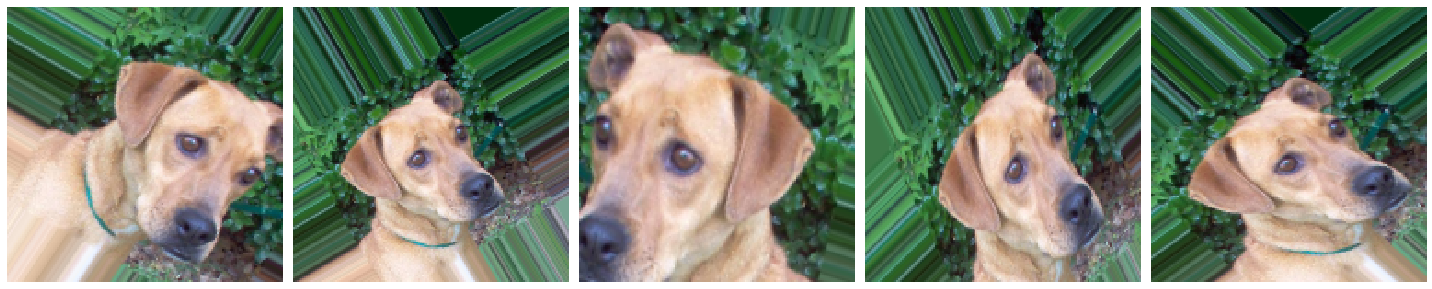

In [23]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

과적합을 방지하기 위해서 dropout을 적용하여 모델을 새로 만든 후, 학습한다.

In [25]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [26]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)       

In [27]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 45s 3s/step - loss: 1.3365 - accuracy: 0.5016 - val_loss: 0.6925 - val_accuracy: 0.5045
Epoch 2/15
15/15 [==============================] - 52s 3s/step - loss: 0.6922 - accuracy: 0.4989 - val_loss: 0.6909 - val_accuracy: 0.5045
Epoch 3/15
15/15 [==============================] - 50s 3s/step - loss: 0.6922 - accuracy: 0.5064 - val_loss: 0.6879 - val_accuracy: 0.5045
Epoch 4/15
15/15 [==============================] - 50s 3s/step - loss: 0.6910 - accuracy: 0.4989 - val_loss: 0.6832 - val_accuracy: 0.5045
Epoch 5/15
15/15 [==============================] - 51s 3s/step - loss: 0.6796 - accuracy: 0.5192 - val_loss: 0.6562 - val_accuracy: 0.5580
Epoch 6/15
15/15 [==============================] - 51s 3s/step - loss: 0.6738 - accuracy: 0.5230 - val_loss: 0.6470 - val_accuracy: 0.5960
Epoch 7/15
15/15 [==============================] - 55s 4s/step - loss: 0.6693 - accuracy: 0.5365 - val_loss: 0.6532 - val_accuracy: 0.5502
Epoch 8/15
15/15 [==

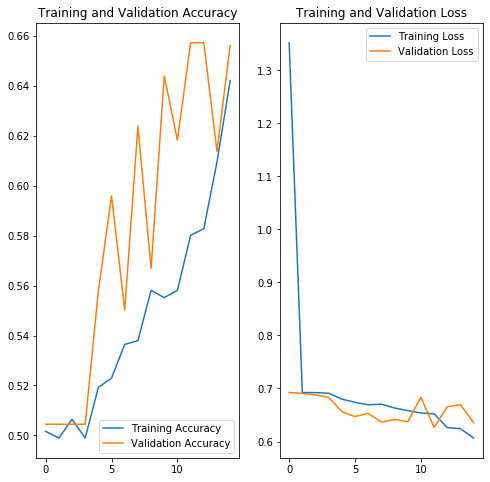

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()